In [1]:
!pip install -r requirements.txt

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.3.0 requires numpy<1.19.0,>=1.16.0, but you have numpy 1.23.3 which is incompatible.



     ---------------------------------------- 7.2/7.2 MB 10.2 MB/s eta 0:00:00
     --------------------------------------- 14.7/14.7 MB 10.6 MB/s eta 0:00:00
  Using cached opencv_python-4.6.0.66-cp36-abi3-win_amd64.whl (35.6 MB)
     ---------------------------------------- 3.3/3.3 MB 10.0 MB/s eta 0:00:00
  Using cached PyYAML-6.0-cp38-cp38-win_amd64.whl (155 kB)
     -------------------------------------- 161.9/161.9 MB 5.7 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 11.2 MB/s eta 0:00:00
     ---------------------------------------- 78.5/78.5 kB 4.3 MB/s eta 0:00:00
     --------------------------------------- 11.0/11.0 MB 11.1 MB/s eta 0:00:00
     -------------------------------------- 285.1/285.1 kB 8.9 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     -------------------------------------- 164.0/164.0 kB 5.0 MB/s eta 0:00:00
  Using cached kiwisolver-1.4.4-cp38-cp38-win_amd64.whl (55 kB)
     ---------------------------

In [2]:
from matplotlib import pyplot as plt
import numpy as np

In [3]:
import torch
torch.__version__

C:\Users\Admin\anaconda3\envs\yolo\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'1.12.1+cpu'

In [4]:
!pip install opencv-python==4.3.0.36
!pip install opencv-contrib-python==4.3.0.36

  Using cached opencv_python-4.3.0.36-cp38-cp38-win_amd64.whl (33.4 MB)
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.6.0.66
    Uninstalling opencv-python-4.6.0.66:
      Successfully uninstalled opencv-python-4.6.0.66


In [5]:
import cv2

In [6]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='runs/train/exp/weights/best.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\sushant/.cache\torch\hub\master.zip
YOLOv5  2022-9-19 Python-3.8.0 torch-1.12.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7031701 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


image 1/1: 800x1360 1 mandatory, 1 other, 7 signals
Speed: 14.0ms pre-process, 150.0ms inference, 1.0ms NMS per image at shape (1, 3, 384, 640)


00888.jpg
None


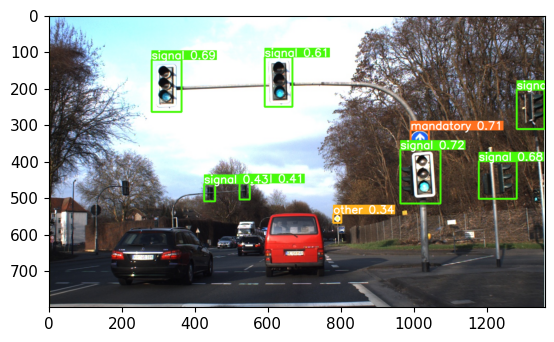

roadmark_1292.jpg


image 1/1: 600x800 3 road markings
Speed: 12.0ms pre-process, 249.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


None


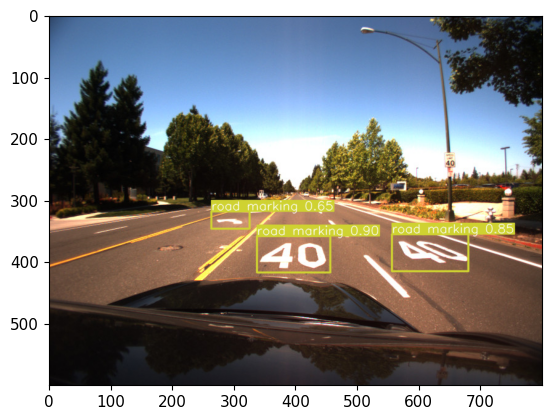

roadmark_1337.jpg


image 1/1: 600x800 1 road marking, 1 signal
Speed: 14.0ms pre-process, 251.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


None


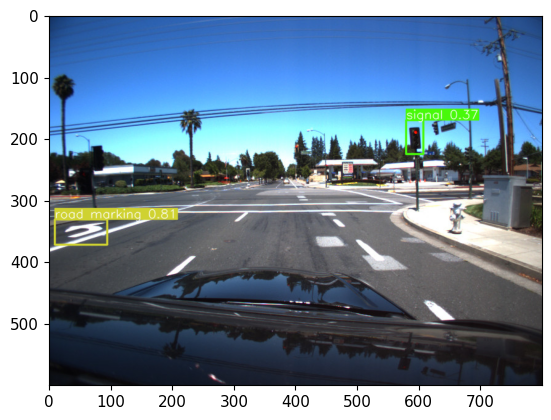

In [8]:
import os
for i in os.listdir("testimages"):
    print(i)
    results = model("testimages/"+str(i))
    print(results.print())
    %matplotlib inline 
    plt.imshow(np.squeeze(results.render()))
    plt.show()
#break

In [9]:
# img

In [9]:
a=results.print()

image 1/1: 600x800 1 road marking, 1 signal
Speed: 14.0ms pre-process, 251.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


In [10]:
a

In [11]:
results

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 600x800 1 road marking, 1 signal
Speed: 14.0ms pre-process, 251.0ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)

In [12]:
results.names

{0: 'prohibitory',
 1: 'danger',
 2: 'mandatory',
 3: 'other',
 4: 'road marking',
 5: 'signal',
 6: 'speed limit',
 7: 'zebra crossing'}

In [13]:
results.pred

[tensor([[9.92006e+00, 3.31273e+02, 9.43171e+01, 3.72919e+02, 8.11621e-01, 4.00000e+00],
         [5.79969e+02, 1.70074e+02, 6.07599e+02, 2.25652e+02, 3.67312e-01, 5.00000e+00]])]

In [14]:
results.xyxy[0]



tensor([[9.92006e+00, 3.31273e+02, 9.43171e+01, 3.72919e+02, 8.11621e-01, 4.00000e+00],
        [5.79969e+02, 1.70074e+02, 6.07599e+02, 2.25652e+02, 3.67312e-01, 5.00000e+00]])

In [15]:
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,9.920063,331.272766,94.317070,372.918884,0.811621,4,road marking
1,579.969482,170.074310,607.599487,225.651550,0.367312,5,signal
